In [30]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/figaro-code"
#exp_names = ["figaro", "mkl", "openblas"]
#exp_names = ["figaro", "postProcThin", "postProcMKL", "mkl", "openblas"]
#exp_names = ["postProcThin", "postProcMKL", "mkl", "openblas"]
#exp_names = ["postProcMKL", "mkl", "openblas"]
#exp_names = ["mkl", "openblas"]
exp_names = ["postProcThin", "figaro"]
exp_paths = {"figaro": "comparisons/performance/figaro_thin_diag", "mkl": "comparisons/performance/python/mkl", "openblas": "comparisons/performance/python/openblas",
"postProcThin": "comparisons/performance/postprocess/thin_diag", 
"postProcMKL": "comparisons/performance/postprocess/lapack"}
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]

start_per = 10
end_per = 100
per_inc = 10

num_measurement = 5

xlsx_name = "time.xlsx"

df_measurement_exps = {}
for exp_name in exp_names: 
    exp_path = exp_paths[exp_name]
    perf_path = os.path.join(path_src, exp_path)
    df_measurement = pd.DataFrame(columns=db_names)

    for db_name in db_names:

        for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)): 
            db_name_per = "{}{}".format(db_name, percent)
            path_xlsx = os.path.join(perf_path, db_name_per, xlsx_name)
            workbook = load_workbook(filename=path_xlsx, data_only=True)
            sheet = workbook.active
            row_count = sheet.max_row
            col_idx = db_idx + 1
            col_letter = get_column_letter(col_idx)
            
            start_row_idx = 2
            np_measures = np.zeros(num_measurement)
            for row_idx_dst in range(start_row_idx, start_row_idx + num_measurement):
                offset_idx = row_idx_dst - start_row_idx
                row_idx_src = row_count - num_measurement  + offset_idx
                val = sheet.cell(row=row_idx_src, column=2).value
                print(exp_name, db_name, db_name_per, val)
                np_measures[offset_idx] = float(val)

            time_avg = np.mean(np_measures[1:])
            df_measurement.at[percent, db_name] = time_avg
            
        print(df_measurement)
        df_measurement.index = df_measurement.index.set_names(['index'])
        df_measurement = df_measurement.astype(float)
    df_measurement_exps[exp_name] = df_measurement






postProcMKL DBRetailer DBRetailer10 5.383296
postProcMKL DBRetailer DBRetailer10 5.460953
postProcMKL DBRetailer DBRetailer10 5.246604
postProcMKL DBRetailer DBRetailer10 5.436057
postProcMKL DBRetailer DBRetailer10 5.340687
postProcMKL DBRetailer DBRetailer20 10.68214
postProcMKL DBRetailer DBRetailer20 10.599715
postProcMKL DBRetailer DBRetailer20 10.838226
postProcMKL DBRetailer DBRetailer20 10.903912
postProcMKL DBRetailer DBRetailer20 10.8392
postProcMKL DBRetailer DBRetailer30 17.130949
postProcMKL DBRetailer DBRetailer30 16.620508
postProcMKL DBRetailer DBRetailer30 16.51
postProcMKL DBRetailer DBRetailer30 16.438017
postProcMKL DBRetailer DBRetailer30 16.02365
postProcMKL DBRetailer DBRetailer40 22.64971
postProcMKL DBRetailer DBRetailer40 20.438892
postProcMKL DBRetailer DBRetailer40 22.533518
postProcMKL DBRetailer DBRetailer40 21.356614
postProcMKL DBRetailer DBRetailer40 22.591041
postProcMKL DBRetailer DBRetailer50 27.762147
postProcMKL DBRetailer DBRetailer50 26.318068
po

In [31]:
"""
import csv
db_name_map = {
    "DBFavorita": "exp1perf-favorita.dat", 
    "DBRetailer": "exp1perf-retailer.dat", 
    "DBYelp": "exp1perf-yelp.dat"
    }
exp_dat_names = ["#percentage of data", "figaro-time", "mkl-time"]

for db_name in db_names:
    dbs_results = []
    for exp_name in exp_names:
        dbs_results.append(df_measurement_exps[exp_name][db_name])
    df_db_results = pd.concat(dbs_results, axis=1)
    df_db_results = df_db_results.reset_index().rename(columns={df_db_results.index.name:'index'})
    df_db_results.columns = exp_dat_names
    df_db_results.to_csv(db_name_map[db_name], float_format='%.2f', sep='\t', index=False, quoting=csv.QUOTE_NONE,  escapechar=" ")

"""

'\nimport csv\ndb_name_map = {\n    "DBFavorita": "exp1perf-favorita.dat", \n    "DBRetailer": "exp1perf-retailer.dat", \n    "DBYelp": "exp1perf-yelp.dat"\n    }\nexp_dat_names = ["#percentage of data", "figaro-time", "mkl-time"]\n\nfor db_name in db_names:\n    dbs_results = []\n    for exp_name in exp_names:\n        dbs_results.append(df_measurement_exps[exp_name][db_name])\n    df_db_results = pd.concat(dbs_results, axis=1)\n    df_db_results = df_db_results.reset_index().rename(columns={df_db_results.index.name:\'index\'})\n    df_db_results.columns = exp_dat_names\n    df_db_results.to_csv(db_name_map[db_name], float_format=\'%.2f\', sep=\'\t\', index=False, quoting=csv.QUOTE_NONE,  escapechar=" ")\n\n'

{'postProcMKL':        DBRetailer  DBFavorita      DBYelp
index                                    
10       5.371075    4.871606   12.149782
20      10.795263    9.717838   24.316146
30      16.398044   14.398782   37.117132
40      21.730016   18.759008   55.348342
50      27.395739   27.469007   82.037504
60      33.619328   32.930719   92.517180
70      37.921773   39.582997  118.599685
80      44.592784   44.726325  137.325369
90      49.480655   54.469125  174.270813
100     68.890604   69.305394  160.041855, 'postProcThin':        DBRetailer  DBFavorita     DBYelp
index                                   
10       8.101926    4.048426  12.727587
20      10.940824    8.087292  24.857437
30      16.358567   12.171517  35.788111
40      19.606802   16.459759  46.784836
50      21.678540   21.297556  56.432646
60      30.892558   24.069601  44.661404
70      32.425594   29.324785  54.221101
80      38.849775   30.736792  61.170716
90      45.561434   36.058514  59.540278
100     44.3

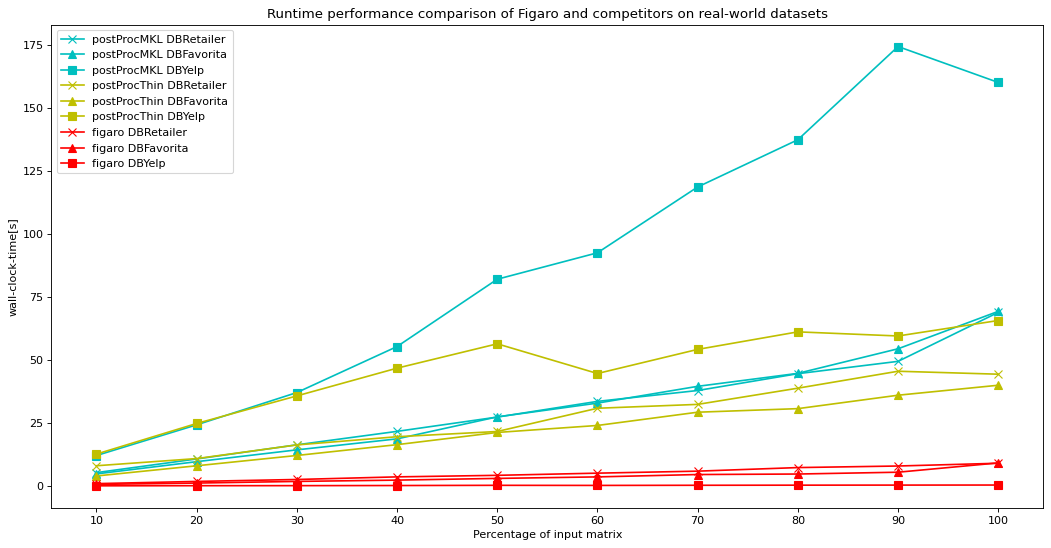

In [32]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of input matrix")
plt.ylabel("wall-clock-time[s]")

plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

plt.yscale('linear')
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_marker =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
exp_colour = {"figaro": "r", "mkl": "b", "openblas": "g",
"postProcThin": "y", "postProcMKL": "c"
}

print(df_measurement_exps)
for exp_name in exp_names:
    print(exp_name)
    df_measurement = df_measurement_exps[exp_name]
    for db_name in df_measurement:
        print(df_measurement[db_name])
        plt.plot(df_measurement[db_name], "-" + exp_colour[exp_name] + db_marker[db_name], label="{} {}".format(exp_name, db_name), markersize=8)
plt.legend(loc="upper left")

plt.show()